# Preprocessing

In [88]:
import numpy as np
import pandas as pd

In [89]:
df = pd.read_csv('data_linereg.csv')

In [90]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


## Splitting into dependant and independant variable set

In [92]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [93]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [94]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [95]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [96]:
from sklearn.impute import SimpleImputer

In [97]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [98]:
imp.fit(X[:, 1:])
X[:, 1:] = imp.transform(X[:, 1:])

In [99]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Label Encoding the dependant variable

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
lab = LabelEncoder()
lab.fit(y)
y = lab.transform(y)

In [102]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## One Hot Encoding the Country feature

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [104]:
col = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(), [0])],
    remainder = 'passthrough'
)
col.fit(X)
X = col.transform(X)

In [105]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

## Split the data to train-test

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [108]:
X_train

array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [109]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object)

In [110]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [111]:
y_test

array([0, 0])

## Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scal = StandardScaler()
scal.fit(X_train[:, -2:])
X_train[:, -2:] = scal.transform(X_train[:, -2:])
X_test[:, -2:] = scal.transform(X_test[:, -2:])

In [114]:
X_train

array([[0.0, 1.0, 0.0, 0.2630675731713538, 0.1238147854838185],
       [1.0, 0.0, 0.0, -0.25350147960148617, 0.4617563176278856],
       [0.0, 0.0, 1.0, -1.9753983221776195, -1.5309334063940294],
       [0.0, 0.0, 1.0, 0.05261351463427101, -1.1114197802841526],
       [1.0, 0.0, 0.0, 1.6405850472322605, 1.7202971959575162],
       [0.0, 0.0, 1.0, -0.08131179534387283, -0.16751412153692966],
       [1.0, 0.0, 0.0, 0.9518263102018072, 0.9861483502652316],
       [1.0, 0.0, 0.0, -0.5978808481167128, -0.48214934111933727]],
      dtype=object)

In [115]:
X_test

array([[0.0, 1.0, 0.0, -1.4588292694047795, -0.9016629672292141],
       [0.0, 1.0, 0.0, 1.984964415747487, 2.139810822067393]],
      dtype=object)

## Simple Linear Regression - Model

In [116]:
df = pd.read_csv('Salary_Data.csv')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [118]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [119]:
X = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

In [120]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [121]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = reg.predict(X_test)

In [127]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [128]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [130]:
X_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [131]:
from matplotlib import pyplot as plt

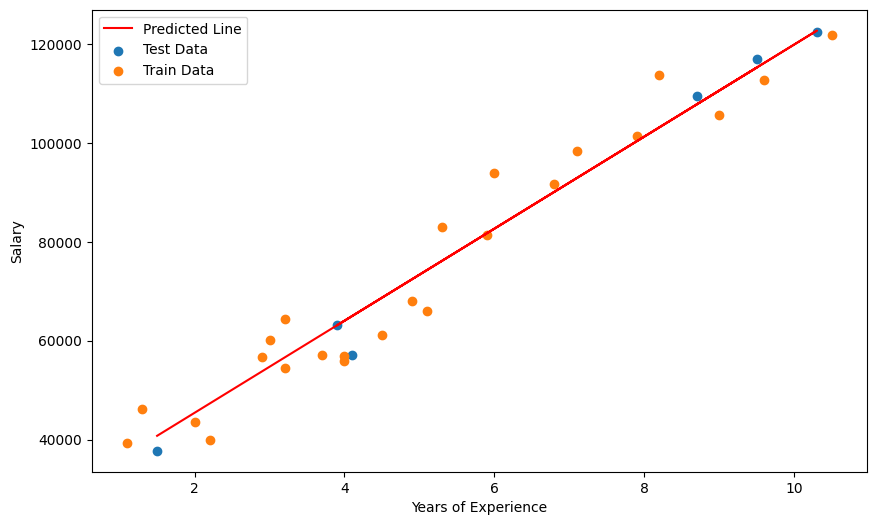

In [139]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6), dpi = 100)
ax.plot(X_test, y_pred, color = 'red', label = 'Predicted Line')
ax.scatter(X_test, y_test, label = 'Test Data')
ax.scatter(X_train, y_train, label = 'Train Data')
ax.legend(loc = 'best')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
plt.show()

## Multiple Linear Regression

In [140]:
df = pd.read_csv('50_Startups.csv')

In [141]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [143]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [144]:
onehot = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(), [-1])],
    remainder = 'passthrough'
)
onehot.fit(X)
X = onehot.transform(X)

In [145]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [147]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [148]:
y_pred = reg.predict(X_test)

In [150]:
np.concatenate(
    (
        y_test.reshape(len(y_test), 1),
        y_pred.reshape(len(y_pred), 1)
    ),
    axis = 1
)

array([[103282.38      , 103015.20159796],
       [144259.4       , 132582.27760815],
       [146121.95      , 132447.73845175],
       [ 77798.83      ,  71976.09851258],
       [191050.39      , 178537.48221056],
       [105008.31      , 116161.24230167],
       [ 81229.06      ,  67851.69209676],
       [ 97483.56      ,  98791.73374687],
       [110352.25      , 113969.43533013],
       [166187.94      , 167921.06569551]])